In [1]:
import numpy as np
from scipy.integrate import quad
import scipy.constants as const
import matplotlib.pyplot as plt

In [2]:
# Value

kpc = 3.086e+19

M_sol = 1.9884e30

R_0 = 8.5 * kpc

c = const.c

G = const.G

L = 50 * kpc

In [6]:
# Einstein Raidus
def e(x):
    return np.sqrt(4 * G * M_sol * L * x * (1-x) / c**2)

# Densities

# Bulge
def r1(x, l):
    m1 = 1.55e10 * M_sol
    rb = 0.70 * kpc
    return 2 * m1 * rb / (l * x * (rb + l *x)**3)

# Disk
def r2(x, l):
    m2 = 3.65e10 * M_sol
    l1 = 2.35 * kpc
    H = 0.14 * kpc
    return m2 * np.exp(-l * x / l1) / (l1**2 * H)

# Gas
def r3(x, l):
    m3 = 0.82e10 * M_sol
    rg = 18.14 * kpc
    zd = 0.52 * kpc
    return m3 * np.exp(-l * x / rg) / (rg**2 * zd)

# Halo
def r4(x, l):
    rho_0 = 0.01992 * M_sol  / kpc**3
    rh = 11.41 * kpc
    n= 0.43
    return rho_0 * np.exp(-(l * x / rh)**(1/n))

# Total Density
def r(x, l):
    return r4(x, l)

#+r4(x, l)

def int(x, l):
    return 4 * np.pi * G * (l - 8.5 * kpc)**2 * r(x, l) / c**2

In [12]:
l_value = np.arange(8.5, 50, 0.5)

int_val = []

for k in l_value:
    l = k * kpc
    
    result, error = quad(int, R_0/l, 1, args=(l,))
    int_val.append(result)
    
int_val = np.array(int_val)
    
   
print(int_val)

[0.00000000e+00 9.70005613e-20 7.08812494e-19 2.18845311e-18
 4.75195154e-18 8.51233198e-18 1.35059490e-17 1.97131978e-17
 2.70749516e-17 3.55056491e-17 4.49036845e-17 5.51595743e-17
 6.61622635e-17 7.78038618e-17 8.99830537e-17 1.02607393e-16
 1.15594674e-16 1.28873548e-16 1.42383549e-16 1.56074656e-16
 1.69906542e-16 1.83847590e-16 1.97873800e-16 2.11967640e-16
 2.26116920e-16 2.40313725e-16 2.54553446e-16 2.68833924e-16
 2.83154720e-16 2.97516514e-16 3.11920623e-16 3.26368629e-16
 3.40862112e-16 3.55402463e-16 3.69990766e-16 3.84627735e-16
 3.99313700e-16 4.14048609e-16 4.28832069e-16 4.43663380e-16
 4.58541591e-16 4.73465547e-16 4.88433937e-16 5.03445345e-16
 5.18498277e-16 5.33591208e-16 5.48722597e-16 5.63890917e-16
 5.79094667e-16 5.94332387e-16 6.09602664e-16 6.24904141e-16
 6.40235517e-16 6.55595548e-16 6.70983052e-16 6.86396902e-16
 7.01836029e-16 7.17299416e-16 7.32786099e-16 7.48295162e-16
 7.63825735e-16 7.79376992e-16 7.94948150e-16 8.10538462e-16
 8.26147220e-16 8.417737

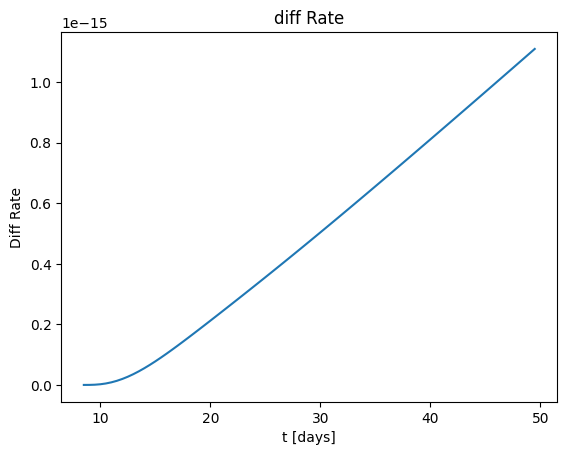

In [13]:
# Create the plot
fig, ax = plt.subplots()

# Plot the data
ax.plot(l_value, int_val)

'''
# Set major ticks locator and format
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.xaxis.set_minor_locator(plt.MultipleLocator(2))
#ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

# Customize the ticks
ax.tick_params(axis='x', which='major', length=10, width=2)
ax.tick_params(axis='x', which='minor', length=5, width=1, color='gray')
'''

# Set labels
ax.set_xlabel('t [days]')
ax.set_ylabel('Diff Rate')
ax.set_title('diff Rate')

# Show the grid
ax.grid(False, which='both')

# Display the plot
plt.show()